In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


missing values present in it and string values need to be encoded.

In [3]:
df.shape

(891, 12)

There are 891 rows and 12 columns

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in Age, 687 null values in Cabin and 2 null values in Embarked. string values need to be encoded

In [5]:
df = df.dropna(subset=['Embarked'])

dropped the null values from target column

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
df.shape

(889, 12)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

we have age and fare is in float value .  ticket, cabin, embarked are in object other independent variables are in integers.

In [9]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The target column is not balanced So we have to balance it.

In [11]:
df["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)


In [13]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,522,18,146,2
1,1,1,0,190,0,51,1,0,595,207,80,0
2,2,1,2,353,0,34,0,0,668,41,146,2
3,3,1,0,272,0,47,1,0,48,189,54,2
4,4,0,2,15,1,47,0,0,471,43,146,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,884,0,1,547,1,35,0,0,100,85,146,2
887,885,1,0,303,0,24,0,0,14,153,29,2
888,886,0,2,412,0,88,1,2,674,131,146,2
889,887,1,0,81,1,34,0,0,8,153,59,0


All the string columns converted to numbers by using labelencoder

In [14]:
df1["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [15]:
df1["Survived"].isnull().sum()

0

# EDA

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It shows all the statistical values

# Univariate analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

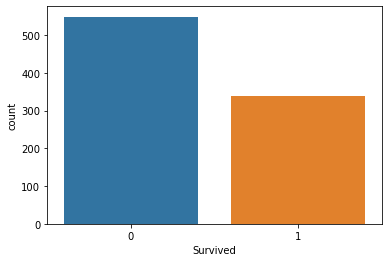

In [17]:
sn.countplot(df["Survived"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

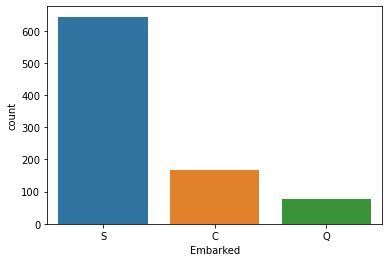

In [18]:
sn.countplot(df["Embarked"])

There are imbalance in the target columns

In [19]:
dfx=df1.loc[:, df1.columns != 'Survived']
dfx

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,108,1,28,1,0,522,18,146,2
1,1,0,190,0,51,1,0,595,207,80,0
2,2,2,353,0,34,0,0,668,41,146,2
3,3,0,272,0,47,1,0,48,189,54,2
4,4,2,15,1,47,0,0,471,43,146,2
...,...,...,...,...,...,...,...,...,...,...,...
886,884,1,547,1,35,0,0,100,85,146,2
887,885,0,303,0,24,0,0,14,153,29,2
888,886,2,412,0,88,1,2,674,131,146,2
889,887,0,81,1,34,0,0,8,153,59,0


Removed the survived column as it is the target column and assigned it as dfy

In [20]:
dfy=df1.iloc[:,1]
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [21]:
import sklearn
sklearn.__version__

'0.24.1'

In [22]:
import numpy
numpy.__version__

'1.20.1'

In [23]:

from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [24]:
trainy.value_counts()

0    549
1    549
Name: Survived, dtype: int64

Balanced the data in the target column

In [25]:
trainx.value_counts()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
0            2       108   1    28   1      0      522     18    146    2           1
592          2       100   0    88   0      2      433     30    146    1           1
597          2       98    1    88   0      0      191     16    146    0           1
596          2       408   1    64   0      0      573     0     146    2           1
595          1       469   0    88   0      0      154     162   146    2           1
                                                                                   ..
297          0       713   1    88   0      0      97      155   50     2           1
298          0       71    0    65   0      1      584     243   35     0           1
299          0       862   0    47   0      0      610     238   94     0           1
             2       430   0    88   0      0      512     30    146    1           1
888          2       220   1    42   0      0      465     

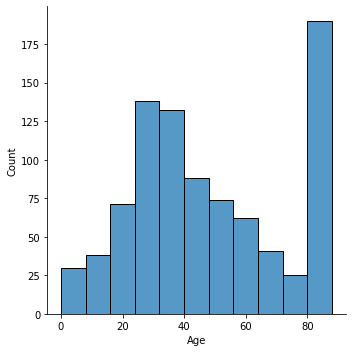

In [26]:
sn.displot(df1["Age"])

Its not normaly distributed

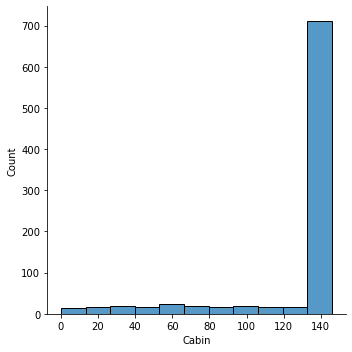

In [27]:
sn.displot(df1["Cabin"])

This also not normaly distributed

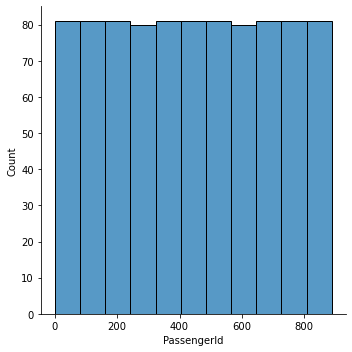

In [28]:
sn.displot(df1["PassengerId"])

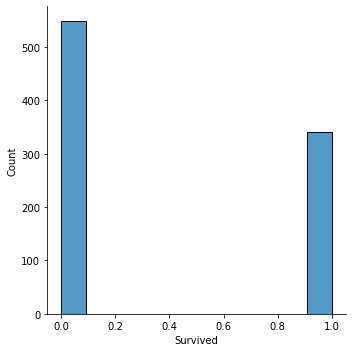

In [29]:
sn.displot(df1["Survived"])

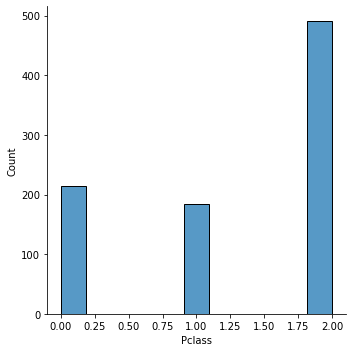

In [30]:
sn.displot(df1["Pclass"])

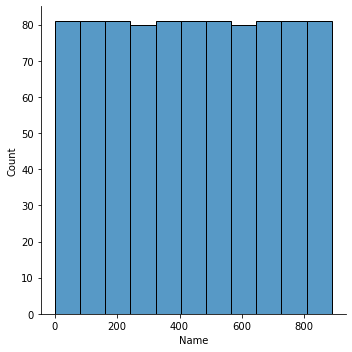

In [31]:
sn.displot(df1["Name"])

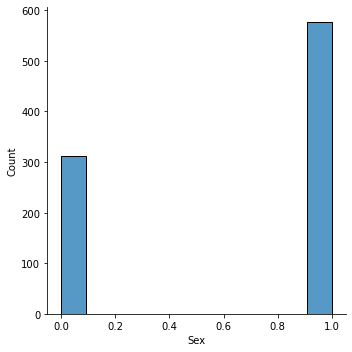

In [32]:
sn.displot(df1["Sex"])

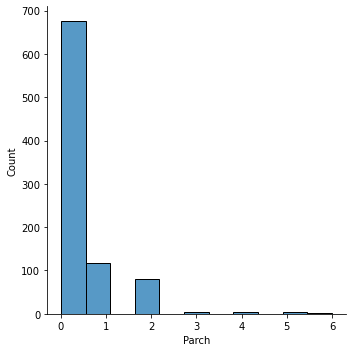

In [33]:
sn.displot(df1["Parch"])

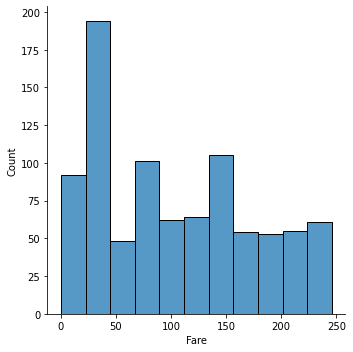

In [34]:
sn.displot(df1["Fare"])

Age and Cabin columns are not normally distributed. So we have to remove the null values by using median 

In [35]:
df1["Age"]=df1["Age"].fillna(df1["Age"].median())
df1["Cabin"]=df1["Cabin"].fillna(df1["Cabin"].median())

In [36]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All the null values removed

# Bivariate analysis

<AxesSubplot:title={'center':'comparison between Sex and age'}, xlabel='Age', ylabel='Sex'>

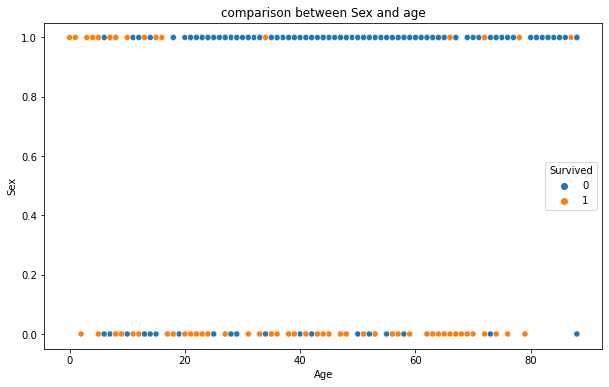

In [37]:
plt.figure(figsize=[10,6])
plt.title("comparison between Sex and age")
sn.scatterplot(df1['Age'],df1['Sex'],hue=df1["Survived"])

<AxesSubplot:title={'center':'comparison between Pclass and Survived '}, xlabel='Pclass', ylabel='Survived'>

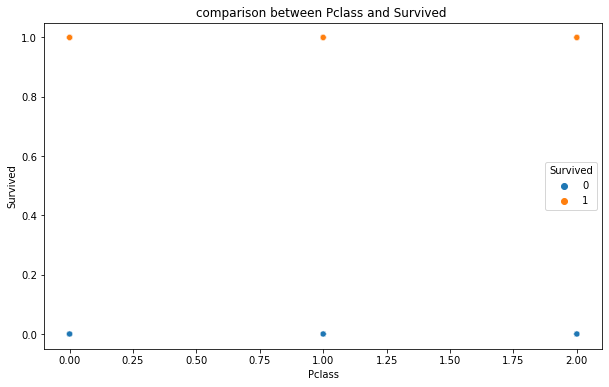

In [52]:
plt.figure(figsize=[10,6])
plt.title("comparison between Pclass and Survived ")
sn.scatterplot(df1['Pclass'],df1['Survived'],hue=df1["Survived"])

<AxesSubplot:title={'center':'comparison between Age and Survived '}, xlabel='Age', ylabel='Survived'>

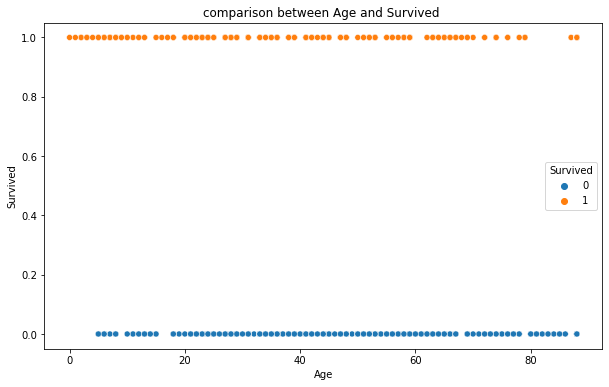

In [53]:
plt.figure(figsize=[10,6])
plt.title("comparison between Age and Survived ")
sn.scatterplot(df1['Age'],df1['Survived'],hue=df1["Survived"])

<AxesSubplot:title={'center':'comparison between Cabin  and Survived '}, xlabel='Cabin', ylabel='Survived'>

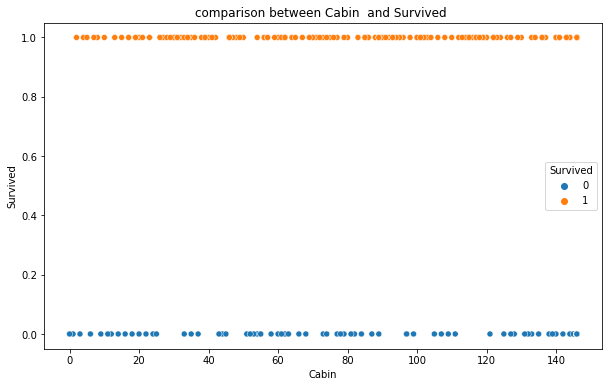

In [55]:
plt.figure(figsize=[10,6])
plt.title("comparison between Cabin  and Survived ")
sn.scatterplot(df1['Cabin'],df1['Survived'],hue=df1["Survived"])

The above scatterplots are showing the comparison of each columns with survivors

In [38]:
cor=df1.corr()
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.004997,-0.035345,-0.041267,0.043118,0.004010,-0.065403,-0.001663,-0.056888,-0.006467,-0.035511,0.013144
Survived,-0.004997,1.000000,-0.335549,-0.059075,-0.541585,-0.114218,-0.024999,0.083151,-0.160931,0.330690,-0.249650,-0.169718
Pclass,-0.035345,-0.335549,1.000000,0.054837,0.127741,-0.079627,0.076597,0.016824,0.315959,-0.722251,0.682959,0.164681
Name,-0.041267,-0.059075,0.054837,1.000000,0.022087,0.170951,-0.034860,-0.048533,0.049406,-0.055858,0.066396,-0.006849
Sex,0.043118,-0.541585,0.127741,0.022087,1.000000,0.095623,-0.124997,-0.247508,0.055024,-0.261615,0.088948,0.110320
Age,0.004010,-0.114218,-0.079627,0.170951,0.095623,1.000000,-0.165406,-0.202207,-0.019381,-0.055375,-0.061137,-0.134169
SibSp,-0.065403,-0.024999,0.076597,-0.034860,-0.124997,-0.165406,1.000000,0.423029,0.067632,0.372316,0.037545,0.066345
Parch,-0.001663,0.083151,0.016824,-0.048533,-0.247508,-0.202207,0.423029,1.000000,0.018409,0.364430,-0.032082,0.040449
Ticket,-0.056888,-0.160931,0.315959,0.049406,0.055024,-0.019381,0.067632,0.018409,1.000000,-0.163641,0.236147,0.000271
Fare,-0.006467,0.330690,-0.722251,-0.055858,-0.261615,-0.055375,0.372316,0.364430,-0.163641,1.000000,-0.536320,-0.160149


These shows the correlation between the variables

<AxesSubplot:>

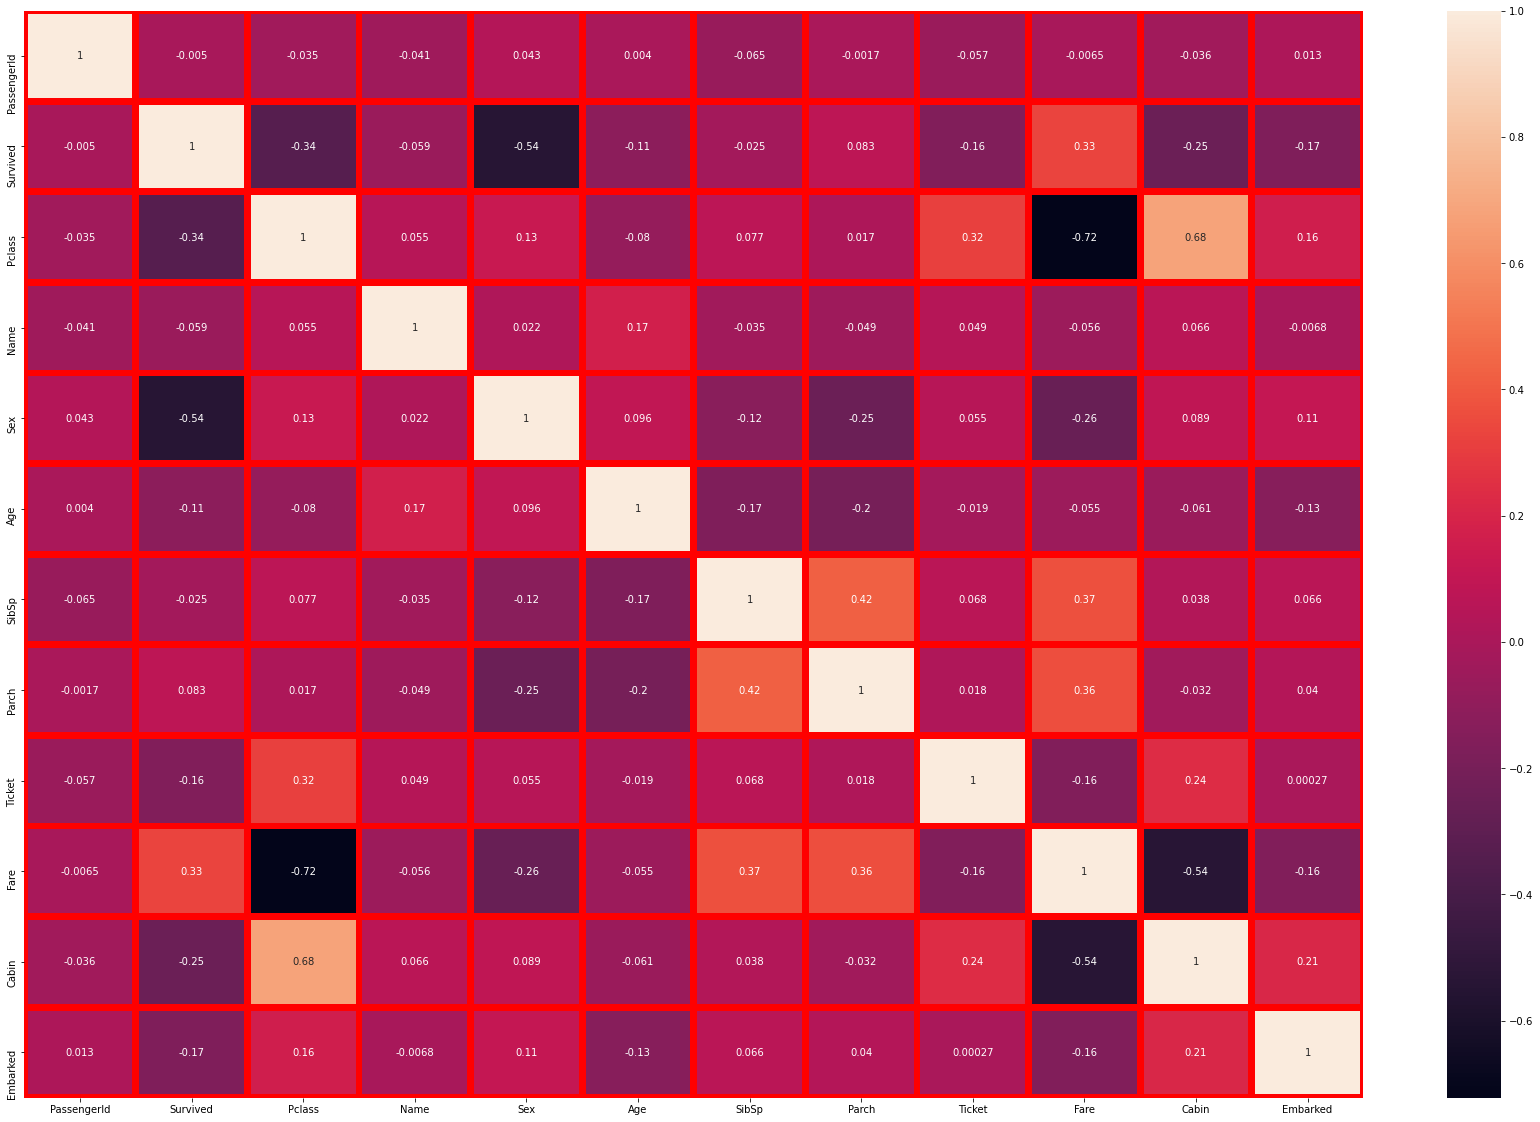

In [39]:
plt.figure(figsize=[30,20])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

There are no multicollinearity between columns and 'Sex' column is highly negatively correlated with the target

In [40]:
df1.drop(["Sex"],axis=1,inplace=True)

PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Name           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Parch          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Ticket               AxesSubplot(0.125,0.125;0.0945122x0.343182)
Fare              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Cabin             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Embarked          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

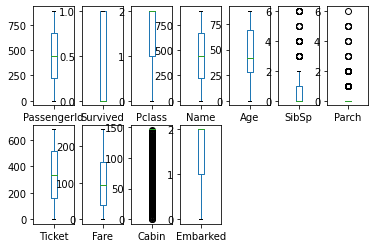

In [41]:
df1.plot(kind="box",subplots=True,layout=(2,7))

There are outliers in SibSp, Parch and Cabin

In [42]:
df1.drop(["Name"],axis=1,inplace=True)

# Outlier Remover

In [43]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df1))
new_df=df1[(z<3).all(axis=1)]

In [45]:
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,28,1,0,522,18,146,2
1,1,1,0,51,1,0,595,207,80,0
2,2,1,2,34,0,0,668,41,146,2
3,3,1,0,47,1,0,48,189,54,2
4,4,0,2,47,0,0,471,43,146,2
...,...,...,...,...,...,...,...,...,...,...
886,884,0,1,35,0,0,100,85,146,2
887,885,1,0,24,0,0,14,153,29,2
888,886,0,2,88,1,2,674,131,146,2
889,887,1,0,34,0,0,8,153,59,0


In [46]:
new_df.shape

(816, 10)

In [47]:
(73/889)

0.08211473565804274

# skewness

In [48]:
new_df.skew()

PassengerId    0.002929
Survived       0.458449
Pclass        -0.659468
Age            0.347267
SibSp          1.995703
Parch          2.053591
Ticket         0.008958
Fare           0.537825
Cabin         -2.294573
Embarked      -1.257532
dtype: float64

There are skewness present in SibSp, Parch,Cabin and Embarked columns .  But they are not numerical columns.

In [49]:
df1.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
Age            0.310759
SibSp          2.946014
Parch          2.745160
Ticket        -0.000959
Fare           0.365163
Cabin         -2.183004
Embarked      -1.261367
dtype: float64

# Scaling

In [56]:
dfb=df1.loc[:,['Cabin']]
dfb

,Cabin
0,146
1,80
2,146
3,54
4,146
...,...
886,146
887,29
888,146
889,59


In [57]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df1['Cabin']=mn.fit_transform(dfb)
df1['Cabin']

0      1.000000
1      0.547945
2      1.000000
3      0.369863
4      1.000000
         ...   
886    1.000000
887    0.198630
888    1.000000
889    0.404110
890    1.000000
Name: Cabin, Length: 889, dtype: float64

In [58]:
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,28,1,0,522,18,1.000000,2
1,1,1,0,51,1,0,595,207,0.547945,0
2,2,1,2,34,0,0,668,41,1.000000,2
3,3,1,0,47,1,0,48,189,0.369863,2
4,4,0,2,47,0,0,471,43,1.000000,2
...,...,...,...,...,...,...,...,...,...,...
886,884,0,1,35,0,0,100,85,1.000000,2
887,885,1,0,24,0,0,14,153,0.198630,2
888,886,0,2,88,1,2,674,131,1.000000,2
889,887,1,0,34,0,0,8,153,0.404110,0


In [64]:
dfa=df1.loc[:,['Ticket']]
dfa

,Ticket
0,522
1,595
2,668
3,48
4,471
...,...
886,100
887,14
888,674
889,8


In [65]:

mn=MinMaxScaler()
df1['Ticket']=mn.fit_transform(dfa)
df1['Ticket']

0      0.768778
1      0.876289
2      0.983800
3      0.070692
4      0.693667
         ...   
886    0.147275
887    0.020619
888    0.992636
889    0.011782
890    0.684831
Name: Ticket, Length: 889, dtype: float64

Done the scaling for cabin and ticket

In [66]:
x=new_df.drop("Survived",axis=1)
y=new_df["Survived"]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=12)

creating the train test split

In [69]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6775510204081633
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       153
           1       0.58      0.51      0.54        92

    accuracy                           0.68       245
   macro avg       0.65      0.64      0.65       245
weighted avg       0.67      0.68      0.67       245



By using DecisionTreeClassifier. Got the accuracy as 0.68

In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7020408163265306
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       153
           1       0.71      0.35      0.47        92

    accuracy                           0.70       245
   macro avg       0.71      0.63      0.63       245
weighted avg       0.70      0.70      0.67       245



By using SVC .Got accuracy as 0.70

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predsvc))

0.6571428571428571
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       153
           1       0.71      0.35      0.47        92

    accuracy                           0.70       245
   macro avg       0.71      0.63      0.63       245
weighted avg       0.70      0.70      0.67       245



By using KNeighborsClassifier. Got accuaracy as 0.66

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [74]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7673469387755102
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       153
           1       0.74      0.59      0.65        92

    accuracy                           0.77       245
   macro avg       0.76      0.73      0.74       245
weighted avg       0.76      0.77      0.76       245



By using RandomForestClassifier. Got accuaracy as 0.77

By using DecisionTreeClassifier, got the accuracy as 0.68, By using SVC,got accuracy as 0.70, By using KNeighborsClassifier. Got accuaracy as 0.66,By using RandomForestClassifier. Got accuaracy as 0.77

# Cross validation Score

In [75]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dtc,x,y,cv=5).mean())

0.6618360017956008


In [76]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.6741283854556337


In [77]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.638523118360018


In [78]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7169609456830764


Difference between dtc is 2,svc is 3, knn is 2, and rfc is 6. So DecisionTreeClassifier is having best accuracy and its giving the best model also.

# Hyper parameter tunning

In [79]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [80]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_features':['auto','sqrt','log2']}

created the parameter list

In [81]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [83]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'random'}

These are the best parameters

In [84]:
final_model=DecisionTreeClassifier(criterion='gini',max_depth= 7, max_features='sqrt',splitter= 'random')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print (accuracy*100)

66.53061224489795


So here got the best model with DecisionTreeClassifier with accuracy 66.5. We used the parmeters criterion='gini',max_depth= 7, max_features='sqrt',splitter= 'random'

# Ploltting AOC RUC CURVE

In [86]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [87]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]

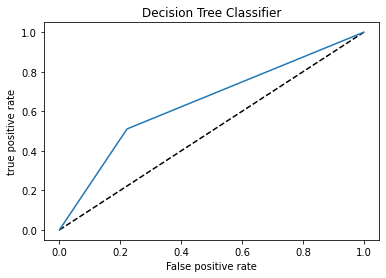

0.6443236714975846

In [88]:
fbr,tbr,thresholds=roc_curve(y_test,y_pred_prob) 
plt.plot([0,1],[0,1],'k--') 
plt.plot(fbr,tbr,label="Decision Tree Classifier")
plt.xlabel('False positive rate')
plt.ylabel('true positive rate') 
plt.title('Decision Tree Classifier')
plt.show() 
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

plotted the AOC RUC Curve . Got the accuracy as 64%

# Saving the model

In [89]:
import joblib
joblib.dump(final_model,"Final Model of Titanic.pkl")

['Final Model of Titanic.pkl']

Saved the model